# Assignment 2

Sven Den Hartog, s1003026 

Denise Klep, s4210646

In [1]:
import numpy as np
import chainer
from chainer import cuda, Function, gradient_check, report, training, utils, Variable
from chainer import datasets, iterators, optimizers, serializers
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L
from chainer.training import extensions
from chainer.dataset import concat_examples
from chainer.cuda import to_cpu
from chainer import serializers
import matplotlib.pyplot as plt
import utils

# 1

In [5]:
max_epoch = 20
batchsize = 32

train, test = utils.get_mnist(n_train=100, n_test=100)
optimizer = optimizers.SGD()

We use the same parameters as the previous assignment but we will train three MLPs with 1, 2 and 3 layers.

In [8]:
class MLP1(Chain):
    def __init__(self, n_units, n_out):
        super(MLP1, self).__init__()
        with self.init_scope():
            self.l1 = L.Linear(None, n_out)

    def __call__(self, x):
        y = F.relu(self.l1(x))
        return y
    
class MLP2(Chain):
    def __init__(self, n_units, n_out):
        super(MLP2, self).__init__()
        with self.init_scope():
            self.l1 = L.Linear(None, n_units)
            self.l2 = L.Linear(None, n_out)

    def __call__(self, x):
        h = F.relu(self.l1(x))
        y = self.l2(h)
        return y
    
class MLP3(Chain):
    def __init__(self, n_units, n_out):
        super(MLP3, self).__init__()
        with self.init_scope():
            self.l1 = L.Linear(None, n_units)
            self.l2 = L.Linear(None, n_units)
            self.l3 = L.Linear(None, n_out)

    def __call__(self, x):
        h = F.relu(self.l1(x))
        h = F.relu(self.l2(h))
        y = self.l3(h)
        return y

In [12]:
model = MLP1(n_units=10, n_out=10)
optimizer.setup(model)
train_iter = iterators.SerialIterator(train, batchsize)
test_iter = iterators.SerialIterator(test, batchsize, repeat=False, shuffle=False)
mean_test_loss1 = [] 
mean_train_loss1 = []
train_losses = []
while train_iter.epoch < max_epoch:

    train_batch = train_iter.next()
    image_train, target_train = concat_examples(train_batch)
    prediction_train = model(image_train)
    loss = F.softmax_cross_entropy(prediction_train, target_train)
    train_losses1.append(loss.data)
    model.cleargrads()
    loss.backward()
    optimizer.update()
    
    if train_iter.is_new_epoch:
        test_losses = []
        while True:
            test_batch = test_iter.next()
            image_test, target_test = concat_examples(test_batch) 
            prediction_test = model(image_test)
            loss_test = F.softmax_cross_entropy(prediction_test, target_test)
            test_losses.append(to_cpu(loss_test.data))
            accuracy = F.accuracy(prediction_test, target_test)
            accuracy.to_cpu()

            if test_iter.is_new_epoch:
                test_iter.epoch = 0
                test_iter.current_position = 0
                test_iter.is_new_epoch = False
                test_iter._pushed_position = None
                break
        mean_test_loss1.append(np.mean(test_losses))
        mean_train_loss1.append(np.mean(train_losses1))
        train_losses = []

In [15]:
model = MLP2(n_units=10, n_out=10)
optimizer.setup(model)
train_iter = iterators.SerialIterator(train, batchsize)
test_iter = iterators.SerialIterator(test, batchsize, repeat=False, shuffle=False)
mean_test_loss2 = [] 
mean_train_loss2 = []
train_losses = []
while train_iter.epoch < max_epoch:

    train_batch = train_iter.next()
    image_train, target_train = concat_examples(train_batch)
    prediction_train = model(image_train)
    loss = F.softmax_cross_entropy(prediction_train, target_train)
    train_losses.append(loss.data)
    model.cleargrads()
    loss.backward()
    optimizer.update()
    
    if train_iter.is_new_epoch:
        test_losses = []
        while True:
            test_batch = test_iter.next()
            image_test, target_test = concat_examples(test_batch) 
            prediction_test = model(image_test)
            loss_test = F.softmax_cross_entropy(prediction_test, target_test)
            test_losses.append(to_cpu(loss_test.data))
            accuracy = F.accuracy(prediction_test, target_test)
            accuracy.to_cpu()

            if test_iter.is_new_epoch:
                test_iter.epoch = 0
                test_iter.current_position = 0
                test_iter.is_new_epoch = False
                test_iter._pushed_position = None
                break
        mean_test_loss2.append(np.mean(test_losses))
        mean_train_loss2.append(np.mean(train_losses))
        train_losses = []

In [16]:
model = MLP3(n_units=10, n_out=10)
optimizer.setup(model)
train_iter = iterators.SerialIterator(train, batchsize)
test_iter = iterators.SerialIterator(test, batchsize, repeat=False, shuffle=False)
mean_test_loss3 = [] 
mean_train_loss3 = []
train_losses = []
while train_iter.epoch < max_epoch:

    train_batch = train_iter.next()
    image_train, target_train = concat_examples(train_batch)
    prediction_train = model(image_train)
    loss = F.softmax_cross_entropy(prediction_train, target_train)
    train_losses.append(loss.data)
    model.cleargrads()
    loss.backward()
    optimizer.update()
    
    if train_iter.is_new_epoch:
        test_losses = []
        while True:
            test_batch = test_iter.next()
            image_test, target_test = concat_examples(test_batch) 
            prediction_test = model(image_test)
            loss_test = F.softmax_cross_entropy(prediction_test, target_test)
            test_losses.append(to_cpu(loss_test.data))
            accuracy = F.accuracy(prediction_test, target_test)
            accuracy.to_cpu()

            if test_iter.is_new_epoch:
                test_iter.epoch = 0
                test_iter.current_position = 0
                test_iter.is_new_epoch = False
                test_iter._pushed_position = None
                break
        mean_test_loss3.append(np.mean(test_losses))
        mean_train_loss3.append(np.mean(train_losses))
        train_losses = []

Here we train all 3 MLPs and save the losses separately.

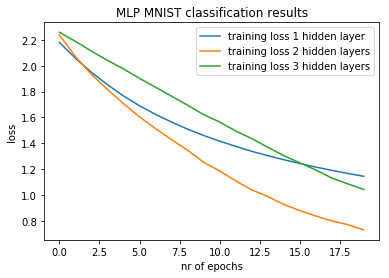

In [19]:
plt.xlabel('nr of epochs')
plt.ylabel('loss')
epochs = range(0,np.size(mean_train_loss1))
plt.plot(epochs,mean_train_loss1,
         label='training loss 1 hidden layer')
plt.plot(epochs,mean_train_loss2,
         label='training loss 2 hidden layers')
plt.plot(epochs,mean_train_loss3,
         label='training loss 3 hidden layers')
plt.legend(loc='upper right')
plt.title('MLP MNIST classification results')
plt.show()

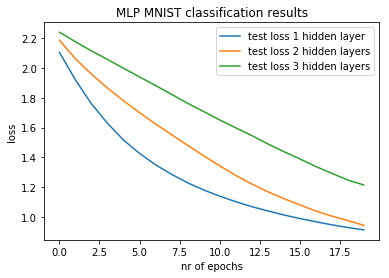

In [20]:
plt.xlabel('nr of epochs')
plt.ylabel('loss')
epochs = range(0,np.size(mean_train_loss1))
plt.plot(epochs,mean_test_loss1,
         label='test loss 1 hidden layer')
plt.plot(epochs,mean_test_loss2,
         label='test loss 2 hidden layers')
plt.plot(epochs,mean_test_loss3,
         label='test loss 3 hidden layers')
plt.legend(loc='upper right')
plt.title('MLP MNIST classification results')
plt.show()

# 2

In [21]:
class Conv(Chain):
    def __init__(self, n_out):
        super(Conv, self).__init__()
        with self.init_scope():
            self.conv = L.Convolution2D(
                in_channels=1, out_channels=5, ksize=5, stride=1, pad=0)
            self.fc = L.Linear(None, n_out)

    def __call__(self, x):
        h = F.sigmoid(self.conv(x))
        h = F.max_pooling_2d(h, 2, 2)
        if chainer.config.train:
            return self.fc(h)
        return F.softmax(self.fc(h))

In [22]:
model = Conv(n_out=10)
optimizer = optimizers.SGD()
optimizer.setup(model)

max_epoch = 20
batchsize = 32

train, test = utils.get_mnist(n_train=100, n_test=100, n_dim=2)
train_iter = iterators.SerialIterator(train, batchsize)
test_iter = iterators.SerialIterator(test, batchsize, repeat=False, shuffle=False)
mean_acc = []
mean_test_loss = []
mean_train_loss = []
train_losses = []

In [23]:
while train_iter.epoch < max_epoch:

    train_batch = train_iter.next()
    image_train, target_train = concat_examples(train_batch)
    #batch conversion function to change batch into image and target arrays suitable for the network
    image_train = np.expand_dims(image_train, axis=1)
    prediction_train = model(image_train)

    loss = F.softmax_cross_entropy(prediction_train, target_train)
    train_losses.append(loss.data)

    model.cleargrads() #renew gradient calculations
    loss.backward() #runs error backpropagation

    optimizer.update() #update variables
    if train_iter.is_new_epoch:

        test_losses = []
        test_accuracies = []
        while True:
            test_batch = test_iter.next()
            image_test, target_test = concat_examples(test_batch) 
            image_test = np.expand_dims(image_test, axis=1)
            prediction_test = model(image_test)

            loss_test = F.softmax_cross_entropy(prediction_test, target_test)
            test_losses.append(to_cpu(loss_test.data))

            accuracy = F.accuracy(prediction_test, target_test)
            accuracy.to_cpu()
            test_accuracies.append(accuracy.data)

            if test_iter.is_new_epoch:
                test_iter.epoch = 0
                test_iter.current_position = 0
                test_iter.is_new_epoch = False
                test_iter._pushed_position = None
                break
                #get out of test loop if test epoch completed

        mean_acc.append(np.mean(test_accuracies))
        mean_test_loss.append(np.mean(test_losses))
        mean_train_loss.append(np.mean(train_losses))
        #track mean losses for visualization later
        train_losses = []

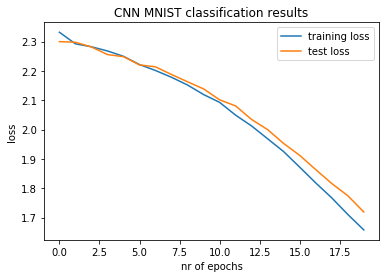

In [24]:
#visualize results for training and test loss values over the epochs
plt.xlabel('nr of epochs')
plt.ylabel('loss')
epochs = range(0,np.size(mean_acc))
plt.plot(epochs,mean_train_loss,
         label='training loss')
plt.plot(epochs,mean_test_loss,
         label='test loss')
plt.legend(loc='upper right')
plt.title('CNN MNIST classification results')
plt.show()

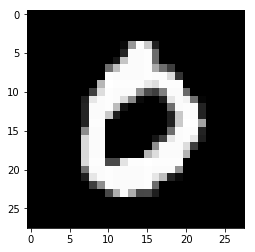

label: 0
predicted label: 0


In [27]:
x, t = test[0]
plt.imshow(x.reshape(28, 28), cmap='gray')
plt.show()
print('label:', t)
x = x[None, ...]
x = np.expand_dims(x, axis=1)
y = model(x)
y = y.data

pred_label = y.argmax(axis=1)
print('predicted label:', pred_label[0])

In [26]:
print(mean_acc)

[0.1015625, 0.094726563, 0.12890625, 0.16601563, 0.16113281, 0.32519531, 0.29296875, 0.42382813, 0.33398438, 0.43066406, 0.40722656, 0.42773438, 0.46679688, 0.50585938, 0.57617188, 0.59863281, 0.58984375, 0.63378906, 0.59082031, 0.67382813]


In [242]:
class Conv2(Chain):
    def __init__(self, n_out):
        super(Conv2, self).__init__()
        with self.init_scope():
            self.conv = L.Convolution2D(
                in_channels=1, out_channels=5, ksize=5, stride=1, pad=0)
            self.fc1 = L.SimplifiedDropconnect(None, n_out, ratio=0.1)

    def __call__(self, x):
        h = F.relu(self.conv(x))
        h = F.max_pooling_2d(h, 2, 2)
        if chainer.config.train:
            return F.relu(self.fc1(h))
        return F.softmax(self.fc(h))

In [243]:
model = Conv2(n_out=10)
optimizer = optimizers.SGD()
optimizer.setup(model)

max_epoch = 20
batchsize = 32

train, test = utils.get_mnist(n_train=100, n_test=100, n_dim=2)
train_iter = iterators.SerialIterator(train, batchsize)
test_iter = iterators.SerialIterator(test, batchsize, repeat=False, shuffle=False)
mean_acc = []
mean_test_loss = []
mean_train_loss = []
train_losses = []

while train_iter.epoch < max_epoch:

    train_batch = train_iter.next()
    image_train, target_train = concat_examples(train_batch)
    #batch conversion function to change batch into image and target arrays suitable for the network
    image_train = np.expand_dims(image_train, axis=1)
    prediction_train = model(image_train)

    loss = F.softmax_cross_entropy(prediction_train, target_train)
    train_losses.append(loss.data)

    model.cleargrads() #renew gradient calculations
    loss.backward() #runs error backpropagation

    optimizer.update() #update variables
    if train_iter.is_new_epoch:

        test_losses = []
        test_accuracies = []
        while True:
            test_batch = test_iter.next()
            image_test, target_test = concat_examples(test_batch) 
            image_test = np.expand_dims(image_test, axis=1)
            prediction_test = model(image_test)

            loss_test = F.softmax_cross_entropy(prediction_test, target_test)
            test_losses.append(to_cpu(loss_test.data))

            accuracy = F.accuracy(prediction_test, target_test)
            accuracy.to_cpu()
            test_accuracies.append(accuracy.data)

            if test_iter.is_new_epoch:
                test_iter.epoch = 0
                test_iter.current_position = 0
                test_iter.is_new_epoch = False
                test_iter._pushed_position = None
                break
                #get out of test loop if test epoch completed

        mean_acc.append(np.mean(test_accuracies))
        mean_test_loss.append(np.mean(test_losses))
        mean_train_loss.append(np.mean(train_losses))
        #track mean losses for visualization later
        train_losses = []

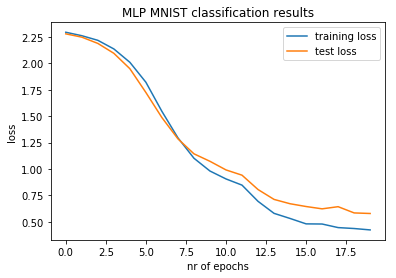

In [244]:
plt.xlabel('nr of epochs')
plt.ylabel('loss')
epochs = range(0,np.size(mean_acc))
plt.plot(epochs,mean_train_loss,
         label='training loss')
plt.plot(epochs,mean_test_loss,
         label='test loss')
plt.legend(loc='upper right')
plt.title('MLP MNIST classification results')
plt.show()

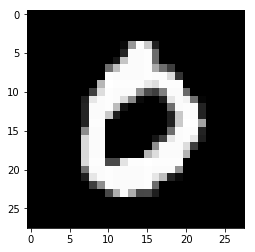

label: 0
predicted label: 0


In [28]:
x, t = test[0]
plt.imshow(x.reshape(28, 28), cmap='gray')
plt.show()
print('label:', t)
x = x[None, ...]
x = np.expand_dims(x, axis=1)
y = model(x)
y = y.data

pred_label = y.argmax(axis=1)
print('predicted label:', pred_label[0])

In [246]:
print(mean_acc)

[0.17089844, 0.22167969, 0.29003906, 0.38378906, 0.4453125, 0.53027344, 0.60449219, 0.65429688, 0.67773438, 0.66796875, 0.69042969, 0.72363281, 0.77539063, 0.79492188, 0.80273438, 0.79589844, 0.79785156, 0.79492188, 0.80664063, 0.82519531]
